In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [14]:
from sklearn.cluster import KMeans
X=np.array([[1,2],[1,4],[1,0],[10,4],[10,0]])

In [5]:
X

array([[ 1,  2],
       [ 1,  4],
       [ 1,  0],
       [10,  4],
       [10,  0]])

## we want to genreate 3 clusters of the data

In [6]:
kmeans=KMeans(n_clusters=3)

In [7]:
kmeans.fit(X)

c:\Users\tusha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\tusha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

## it gives me the cluster name for each point

In [8]:
kmeans.labels_

array([0, 0, 0, 2, 1])

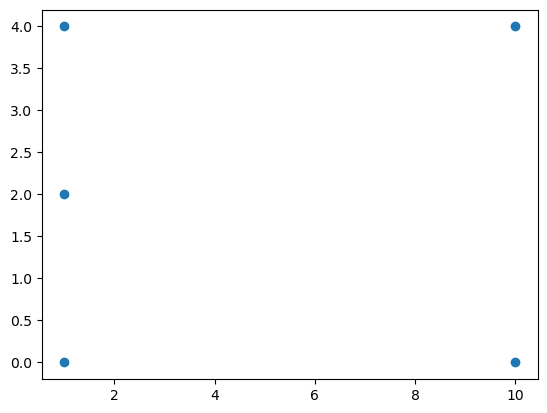

In [10]:
plt.scatter(X[:,0],X[:,1])

In [11]:
data=pd.DataFrame(X)

In [12]:
labels=pd.DataFrame(kmeans.labels_)

In [16]:
datawithlabels=pd.concat([data,labels],axis=1,names=["x","y","cluster number"])

In [17]:
datawithlabels

,0,1,0
0,1,2,0
1,1,4,0
2,1,0,0
3,10,4,2
4,10,0,1


## checking centers of the cluster

In [18]:
kmeans.cluster_centers_

array([[ 1.,  2.],
       [10.,  0.],
       [10.,  4.]])

In [21]:
test_data=np.array([[0,0],[12,3]])

## predicting cluster for new data points

In [22]:
kmeans.predict(test_data)

array([0, 2])

## creating a larger clustered dataset now 

In [17]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2,random_state=10)

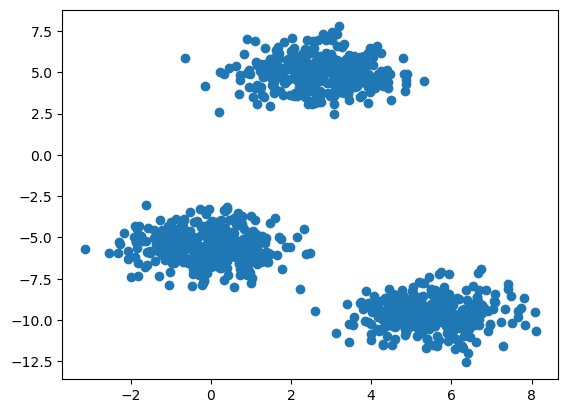

In [18]:
plt.scatter(X[:,0],X[:,1])

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=25)

## checkin wcss for different number of clusters

In [21]:
wcss = []
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

c:\Users\tusha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\tusha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\tusha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\tusha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

In [22]:
wcss

[6366.225028991464,
 1263.0441049831315,
 1103.0533289025411,
 961.9519455733445,
 823.6286493620308,
 734.4288656537298,
 648.6926241729926,
 558.1459889605761,
 517.3770211395989]

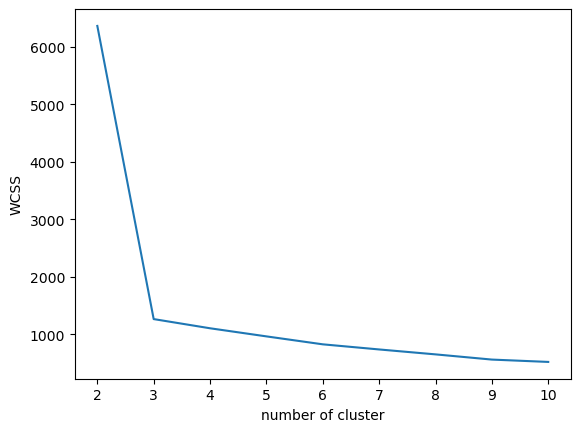

In [24]:
plt.plot(range(2,11),wcss)
plt.xticks(range(2,11))
plt.xlabel("number of cluster")
plt.ylabel("WCSS")
plt.show()

## selecting elbow point as ideal number of cluster (3 here)
bcs after that there is not to much change

In [25]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [26]:
y_labels=kmeans.fit_predict(X_train)

c:\Users\tusha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\tusha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [27]:
y_labels

array([2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 0, 2, 2, 1, 1, 1, 0, 2, 1, 0, 2, 2,
       2, 1, 2, 1, 2, 0, 2, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 1, 1,
       2, 2, 0, 0, 1, 1, 1, 1, 2, 1, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 1,
       2, 1, 2, 2, 0, 2, 2, 0, 2, 1, 1, 0, 1, 0, 0, 2, 0, 0, 1, 1, 0, 2,
       1, 0, 0, 1, 0, 1, 1, 0, 2, 1, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2,
       1, 2, 0, 0, 0, 1, 1, 2, 2, 0, 0, 1, 1, 0, 1, 1, 2, 0, 2, 0, 2, 1,
       0, 1, 2, 0, 1, 2, 0, 0, 1, 1, 0, 2, 1, 2, 0, 2, 0, 2, 2, 1, 2, 0,
       2, 0, 1, 2, 1, 0, 1, 1, 2, 2, 2, 1, 0, 0, 1, 0, 0, 1, 0, 1, 2, 2,
       2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 0, 1, 1, 2, 2, 2,
       0, 1, 0, 1, 0, 0, 1, 0, 2, 1, 0, 0, 2, 0, 2, 0, 1, 1, 1, 2, 2, 0,
       0, 2, 1, 0, 2, 1, 0, 2, 2, 0, 1, 0, 0, 1, 0, 2, 0, 2, 1, 2, 2, 1,
       1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 1, 1, 2, 2, 1, 1, 1, 2, 0, 1, 2,
       2, 1, 0, 0, 2, 2, 0, 2, 2, 1, 2, 0, 2, 1, 2, 0, 0, 1, 1, 2, 1, 0,
       0, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1,

## checking predictions by plotting 

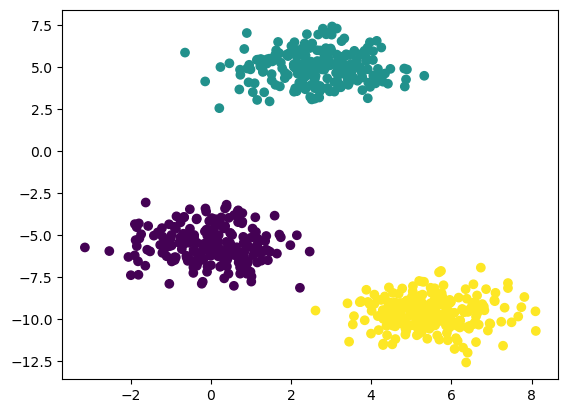

In [30]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

In [31]:
from sklearn.metrics import silhouette_score

## checking silhouette score

In [32]:
silhouette_coefficients = []
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train)
    score = silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficients.append(score)

c:\Users\tusha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\tusha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\tusha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\tusha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

In [33]:
silhouette_coefficients

[0.7269789736846582,
 0.7780104190161053,
 0.6418871884809685,
 0.4691063512498602,
 0.3234507347129698,
 0.33171886059888855,
 0.33609919367035374,
 0.3396676241252251,
 0.3374542780116317]

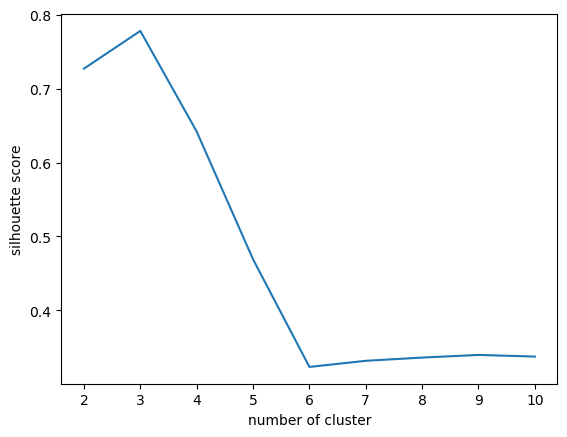

In [34]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("number of cluster")
plt.ylabel("silhouette score")
plt.show()

## selecting highest point as number of clusters (3 here)